In [24]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
split_file_paths = ['https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_1.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_2.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_3.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_4.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_5.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_6.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_7.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_8.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_9.csv',
 'https://raw.githubusercontent.com/Juo-kim/KSME-AI-winter/main/MP_bandgap_part_10.csv']

MP_bandgap = pd.concat([pd.read_csv(file) for file in split_file_paths])

In [26]:
MP_bandgap.drop(['Index', 'Formula', 'mp-id', 'nsites', 'spacegroup_number'], axis=1, inplace = True)

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(MP_bandgap, test_size=0.2, random_state=0)

In [28]:
from pycaret.regression import *

In [29]:
s = setup(train, target='bandgap', session_id = 0, index=False, n_jobs = -1)

,Description,Value
0,Session id,0
1,Target,bandgap
2,Target type,Regression
3,Original data shape,"(1014840, 146)"
4,Transformed data shape,"(1014840, 146)"
5,Transformed train set shape,"(710388, 146)"
6,Transformed test set shape,"(304452, 146)"
7,Numeric features,145
8,Rows with missing values,0.0%
9,Preprocess,True


In [30]:
best = compare_models(include = ['lr', 'dt'], cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.2087,2.2438,1.4979,0.0066,0.6495,14.2120,4.7100
dt,Decision Tree Regressor,1.2548,2.5944,1.6107,-0.1486,0.6997,13.8090,55.2800


In [31]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

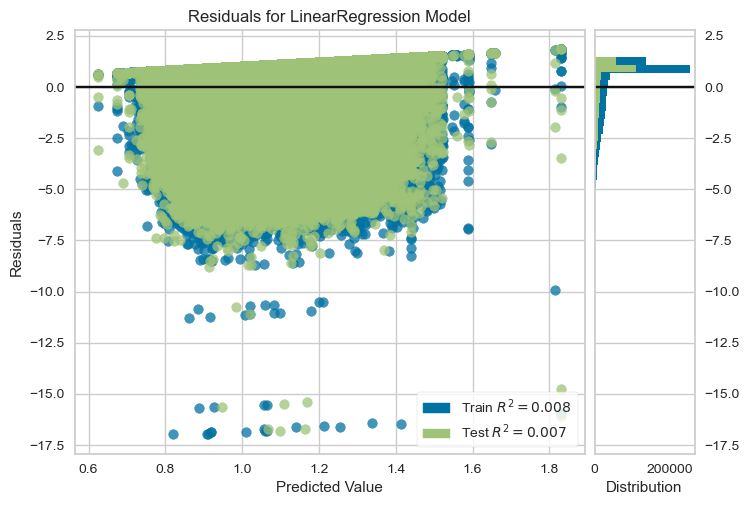

In [32]:
plot_model(best, plot='residuals')

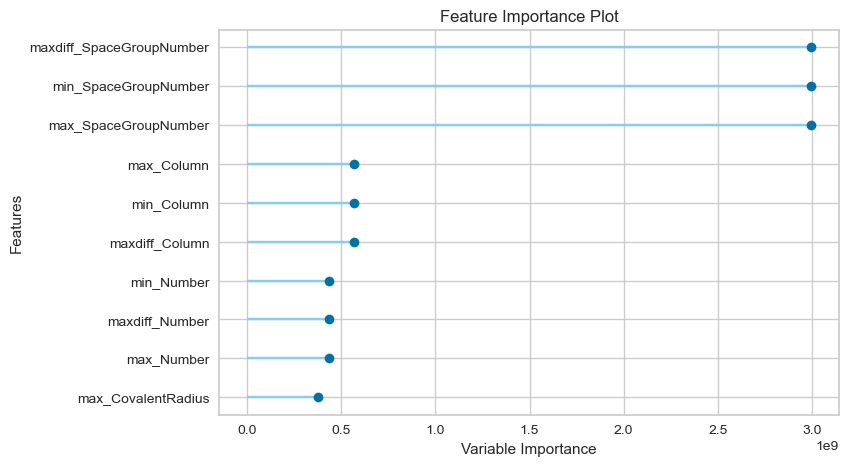

In [33]:
plot_model(best, plot = 'feature')

### Save model

In [34]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/6f/6_lc9cgj1_qgzwkbr1txp5j00000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['NComp', 'Comp_L2Norm',
                                              'Comp_L3Norm', 'Comp_L5Norm',
                                              'Comp_L7Norm', 'Comp_L10Norm',
                                              'mean_Number', 'maxdiff_Number',
                                              'dev_Number', 'max_Number',
                                              'min_Number', 'most_Number',
                                              'mean_MendeleevNumber',
                                              'maxdiff_Mendel...
                                              'dev_AtomicWeight',
                                              'max_AtomicWeight',
                                              'min_AtomicWeight',
                                              'most_AtomicWeight',
               

In [35]:
### Load_model
loaded_model = load_model('best_model')

Transformation Pipeline and Model Successfully Loaded


In [36]:
lr = create_model('lr')
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2047,2.2212,1.4904,0.0070,0.6497,15.6965
1,1.2127,2.2740,1.5080,0.0064,0.6507,13.9903
2,1.2129,2.2705,1.5068,0.0073,0.6507,17.1214
3,1.2079,2.2410,1.4970,0.0085,0.6495,15.0432
4,1.2027,2.2133,1.4877,0.0067,0.6489,16.1797
5,1.2056,2.2369,1.4956,0.0071,0.6493,13.8922
6,1.2090,2.2512,1.5004,0.0064,0.6493,14.1212
7,1.2069,2.2343,1.4948,0.0071,0.6492,14.1026
8,1.2062,2.2324,1.4941,0.0070,0.6485,15.6211


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2572,2.6136,1.6167,-0.1684,0.7053,15.5593
1,1.2670,2.6764,1.6360,-0.1694,0.7078,12.3676
2,1.2679,2.6724,1.6348,-0.1684,0.7081,15.5933
3,1.2644,2.6443,1.6261,-0.1700,0.7073,14.3440
4,1.2558,2.6182,1.6181,-0.1750,0.7054,17.2784
5,1.2592,2.6375,1.6241,-0.1708,0.7062,13.3743
6,1.2688,2.6688,1.6337,-0.1780,0.7090,13.5440
7,1.2575,2.6203,1.6187,-0.1644,0.7042,11.9527
8,1.2612,2.6313,1.6221,-0.1705,0.7056,15.2867


### Tune model

tuned_model = tune_model(best, n_iter = 20, optimize = 'MAE')

### Blending model

In [37]:
blend1 = blend_models(estimator_list = [lr, dt],fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2298,2.3993,1.5490,-0.0578,0.6692,15.6101
1,1.2268,2.3823,1.5435,-0.0589,0.6685,14.7248
2,1.2282,2.3925,1.5468,-0.0567,0.6680,14.6943
Mean,1.2283,2.3914,1.5464,-0.0578,0.6686,15.0097
Std,0.0012,0.0070,0.0023,0.0009,0.0005,0.4247


### Ensemble model

In [38]:
ensembled_model1 = ensemble_model(dt, fold=3) #Bagging
#ensembled_model2 = ensemble_model(dt, method='Boosting', fold=3) #Boosting

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2764,2.7582,1.6608,-0.2160,0.7183,15.0171
1,1.2753,2.7545,1.6597,-0.2244,0.7182,14.8193
2,1.2745,2.7481,1.6577,-0.2138,0.7168,14.3727
Mean,1.2754,2.7536,1.6594,-0.2181,0.7178,14.7364
Std,0.0008,0.0042,0.0013,0.0046,0.0007,0.2695


In [39]:
final_model = finalize_model(blend1)

In [44]:
prediction = predict_model(final_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1.1888,2.2040,1.4846,0.0273,0.6425,13.4030
